In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk   
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords, wordnet
from nltk import PorterStemmer, WordNetLemmatizer 

import string
import collections

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yunsun2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yunsun2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
##Notes
#to view full long text, by iloc()
#a=pd.DataFrame(data['textc']).iloc[1, 0]  

In [3]:
data=pd.read_csv('C:/Users/Yunsun2/Desktop/Github/yelp.csv')

In [4]:
#the stopwords also remove the negative sense words (not, don't), thus abdoned the use of stopwords here. 
#only remove punctuation & digits (much faster!)
def preprocessing(rawtext):
    w="".join(c.lower() for c in rawtext if (c not in string.punctuation) and (not c.isdigit())) 
    return w
    
data['textc']=data['text'].apply(preprocessing)

In [5]:
#Function: tagging with lemmatization
lmtzr = nltk.WordNetLemmatizer().lemmatize 

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def normalize_text(text):
    word_pos = nltk.pos_tag(nltk.word_tokenize(text)) 
    lemm_words = [lmtzr(w[0], get_wordnet_pos(w[1])) for w in word_pos]  #w[0] is word, w[1] is form of the word; 
    return [x.lower() for x in lemm_words]

data['textc']=data['textc'].apply(normalize_text)
data['textc']=data['textc'].apply(lambda x: " ".join(x))

In [6]:
#Bag of all words
worddic=collections.Counter() 
for i in data['textc']: #each line
    #for j in i:  #i is list;  #each word; 
    for j in i.split(): #i is a paragraph; 
        worddic[j]+=1
        
print(len(worddic)) #30220 in total; 

30220


In [7]:
pd.DataFrame(sorted(worddic.values(), reverse=True)).describe(percentiles=[0.01, 0.05, 0.10, 0.25, 
                                                                           0.5, 0.55, 0.60, 0.65, 
                                                                           0.70, 0.75, 0.80, 0.85, 
                                                                           0.9, 0.95, 
                                                                           0.99, 0.992, 0.994, 0.996, 0.998, 0.999])

,0
count,30220.000000
mean,42.825645
std,770.720132
min,1.000000
1%,1.000000
5%,1.000000
10%,1.000000
25%,1.000000
50%,1.000000
55.0%,2.000000


In [8]:
#Rare words: strange/wrong/foreign words 
print(len([k for k, v in worddic.items() if v<5])) #22645; 
#print([k for k, v in worddic.items() if v<5])
rarebow=set([k for k, v in worddic.items() if v<5])   #**************to use for later removal**************; 
#print(rarebow)

22645


In [9]:
#Most frequent words overview; 
lt=range(700, 1300, 100)
for l in lt:
    r=" ".join([k for k, v in worddic.items() if v>l]) 
    print('Number of words w/ counts more than {}: {}'.format(l, len(r)))
#use 1000 as threshold for this analysis; 

Number of words w/ counts more than 700: 1362
Number of words w/ counts more than 800: 1200
Number of words w/ counts more than 900: 1067
Number of words w/ counts more than 1000: 976
Number of words w/ counts more than 1100: 870
Number of words w/ counts more than 1200: 741


In [33]:

#Further filter the group of 'most frequent words', together with tagging; 
mostbow=[k for k, v in worddic.items() if v>1000]  #list of most frequently appeared words; 
#print(mostbow)

b=nltk.pos_tag(mostbow)
c=set([i[1] for i in b]) #list of tags; 
d=[i[0] for i in b] #list of words;
#print(sorted(list(c)))

'''
#********************************************************************
#Manually check each tag category, for decision making; 
for i in b:
    if i[1].startswith('T'):
        print(i[0])
#Remove C, D, I, M, P, T W (keep: like, no, any, but, every, all)
#Remove N (keep: sure, everything, love, dont, didnt, taste, everyone, sunday)
#Remove V (keep: fresh, better)

#Keep J (remove: i, u, other)
#Keep R (remove: about, else, as, here, up, i, back, also, too, there, around, now) 
#********************************************************************
'''

#create the most frequent word dic; 
#1st list to keep; 
tagtup = ('C', 'D', 'I', 'M', 'P', 'T', 'W', 'N', 'V')
expt=['like', 'no', 'any', 'but', 'every', 'all', 'sure', 'everything', 'love', 'dont', 
   'didnt', 'taste', 'everyone', 'sunday', 'fresh', 'better']
add=['i', 'u', 'other', 'about', 'else', 'as', 'here', 'up', 'i', 'back', 'also', 'too', 'there', 'around', 'now']


mostfreqbow=set([i[0] for i in b if i[1].startswith(tagtup) and i[0] not in expt]+add) #*******to use for later removal*******;
print(mostfreqbow)
print(len(mostfreqbow))

{'in', 'we', 'visit', 'sauce', 'bar', 'them', 'order', 'hour', 'use', 'over', 'up', 'go', 'off', 'could', 'he', 'this', 'would', 'time', 'a', 'after', 'friend', 'other', 'year', 'experience', 'there', 'u', 'give', 'know', 'see', 'review', 'of', 'can', 'flavor', 'though', 'take', 'wait', 'restaurant', 'something', 'their', 'also', 'at', 'one', 'will', 'salad', 'look', 'back', 'have', 'way', 'and', 'her', 'say', 'which', 'how', 'while', 'burger', 'serve', 'location', 'me', 'it', 'lunch', 'that', 'what', 'since', 'to', 'area', 'from', 'around', 'too', 'beer', 'our', 'because', 'night', 'else', 'on', 'about', 'drink', 'as', 'do', 'before', 'seem', 'service', 'here', 'staff', 'day', 'or', 'people', 'they', 'side', 'meal', 'thing', 'menu', 'chicken', 'an', 'eat', 'when', 'with', 'your', 'price', 'if', 'the', 'some', 'im', 'need', 'than', 'pizza', 'try', 'come', 'want', 'by', 'now', 'for', 'sit', 'she', 'get', 'feel', 'you', 'make', 'my', 'be', 'bit', 'tell', 'i', 'find', 'who', 'place', 'two

In [41]:
removebow=rarebow.union(mostfreqbow)
len(removebow)

22775

In [57]:
data['textc']=data['textc'].apply(lambda x: " ".join([i for i in x.split() if i not in removebow]))

In [131]:
#Bag of  words
worddic=collections.Counter() 
for i in data['textc']: #each line
    #for j in i:  #i is a (token) list;  #each word; 
    for j in i.split(): #i is a paragraph; 
        worddic[j]+=1
        
print(len(worddic)) #30220 ->7445 after removal of rare+mostfreq bow ->5085 after removal of few doc occurance & noun; 

5085


In [75]:
#words document occurancy 
docfreq=collections.Counter() 
for i in data['textc']:
    for j in set(i.split()):
        docfreq[j]+=1

In [76]:
pd.DataFrame(sorted(docfreq.values(), reverse=True)).describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.5, 0.6, 0.75, 0.9, 
                                                                             0.95, 0.99, 1])

,0
count,7445.000000
mean,61.359704
std,200.953853
min,1.000000
1%,3.000000
5%,4.000000
10%,5.000000
25%,7.000000
50%,13.000000
60%,18.000000


In [99]:
a=[k for k, v in docfreq.items() if v<11]
b=nltk.pos_tag(docfreq.keys())
c=set([i[1] for i in b]) #list of tags; 
#d=[i[0] for i in b] #list of words;
x=[i[0] for i in b if i[1].startswith('N') and i[0] in a]
print(x)

['griddle', 'grip', 'fence', 'whisper', 'foccacia', 'quiessence', 'perch', 'wimp', 'sur', 'condesa', 'nobuo', 'snickerdoodle', 'whos', 'communication', 'jet', 'oldie', 'bastard', 'tang', 'dean', 'dawn', 'rep', 'drift', 'mimis', 'brake', 'dealer', 'cocktails', 'disclaimer', 'walkins', 'inspect', 'perimeter', 'elect', 'morton', 'gristle', 'carbs', 'hover', 'necessity', 'peppermint', 'hound', 'chicagostyle', 'grayhawk', 'france', 'device', 'pine', 'wad', 'war', 'growler', 'jug', 'furthermore', 'conveyor', 'cliff', 'refrigerate', 'imax', 'slope', 'auditorium', 'throat', 'caroline', 'harm', 'fixins', 'fraiche', 'cub', 'carrier', 'foul', 'gravlax', 'dolce', 'hazelnut', 'kindness', 'audition', 'bevmo', 'strongbow', 'maizies', 'jon', 'carbonara', 'jesus', 'christ', 'invitation', 'herei', 'whore', 'incentive', 'beater', 'brioche', 'philadelphia', 'indulgence', 'wifey', 'rokerij', 'modification', 'movement', 'semester', 'ditto', 'apache', 'hardwood', 'transform', 'shack', 'integrity', 'wrist', '

In [110]:
#side checks; 
ranges=[(1, 10), (11, 100), (101, 200), (201, 300), (301, 400), (401, 6000)]
for r in ranges:
    low=r[0]
    high=r[1]

    a=[k for k, v in docfreq.items() if low<=v<=high]
    b=nltk.pos_tag(docfreq.keys())
    x=[i[0] for i in b if i[1].startswith('N') and i[0] in a]
    print('% of Nouns for document freqency betwn {} and {} is: {}'.format(low, high, len(x)/len(a)))

% of Nouns for document freqency betwn 1 and 10 is: 0.5921822099107418
% of Nouns for document freqency betwn 11 and 100 is: 0.5897358032189493
% of Nouns for document freqency betwn 101 and 200 is: 0.5245098039215687
% of Nouns for document freqency betwn 201 and 300 is: 0.5095541401273885
% of Nouns for document freqency betwn 301 and 400 is: 0.47959183673469385
% of Nouns for document freqency betwn 401 and 6000 is: 0.38333333333333336


In [124]:
a=[k for k, v in docfreq.items() if v<15]
b=nltk.pos_tag(docfreq.keys())
raredocbow={i[0] for i in b if i[1].startswith('N') and i[0] in a}  #*************to use for later removal*************;
print(len(raredocbow))
#print(raredocbow)  #can be removed; 

2360


In [132]:
a=[k for k, v in docfreq.items() if v>300]
b=nltk.pos_tag(docfreq.keys())
freqdocbow={i[0] for i in b if i[1].startswith('N') and i[0] in a}
print(len(freqdocbow))
print(freqdocbow)  #all make sense, keep them!

139
{'stand', 'tomato', 'recommend', 'girl', 'keep', 'decor', 'youre', 'cream', 'fact', 'house', 'option', 'part', 'surprise', 'help', 'breakfast', 'music', 'appetizer', 'anything', 'meat', 'steak', 'person', 'lot', 'roll', 'deal', 'quality', 'glass', 'star', 'plate', 'style', 'wouldnt', 'ill', 'point', 'isnt', 'reason', 'rice', 'phoenix', 'dinner', 'item', 'chocolate', 'soup', 'park', 'owner', 'cook', 'return', 'wont', 'spot', 'sandwich', 'play', 'check', 'pm', 'customer', 'portion', 'cheese', 'bring', 'line', 'hand', 'job', 'guy', 'home', 'egg', 'week', 'warm', 'coffee', 'sweet', 'husband', 'pork', 'store', 'fun', 'nothing', 'name', 'problem', 'decide', 'shop', 'pick', 'someone', 'love', 'couple', 'didnt', 'town', 'cant', 'watch', 'show', 'yes', 'selection', 'taste', 'grill', 'couldnt', 'everyone', 'yummy', 'disappoint', 'thats', 'dont', 'today', 'bite', 'guess', 'head', 'patio', 'door', 'change', 'wasnt', 'half', 'group', 'course', 'street', 'choice', 'share', 'id', 'onion', 'list',

In [130]:
data['textc']=data['textc'].apply(lambda x: " ".join([i for i in x.split() if i not in raredocbow])) #all 5085 bow now; 

In [135]:
data['text_len']=data['textc'].apply(len)

In [137]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

Z=data.drop('textc', axis=1)
X=data['textc'] #will add other features back later on for another analysis;   

rs=9876
x_train, x_test, ztrain, ztest = train_test_split(X, Z, test_size=0.3, random_state=rs) 

#TfidfVectorizer
tfidfv=TfidfVectorizer(min_df=2, ngram_range=(1, 1), stop_words='english', max_features=10000, strip_accents='unicode', 
                           norm='l2')
xtrain=tfidfv.fit_transform(x_train).todense()
xtest=tfidfv.transform(x_test).todense()
col = ['feat_'+i for i in tfidfv.get_feature_names()]  #for TfidfVectorizer
#col = ['feat_'+i for i in cv.get_feature_names()]  #for CountVectorizer

_xtrain = pd.DataFrame(xtrain, columns=col)  #feature names added
_xtest = pd.DataFrame(xtest, columns=col)  #row index from 0 to 6999 (number of reviews);  

temptrain=ztrain.loc[:, ['cool', 'useful', 'funny', 'text_len']].reset_index(drop=True)
trainfull=pd.concat([temptrain, _xtrain], axis=1)

temptest=ztest.loc[:, ['cool', 'useful', 'funny', 'text_len']].reset_index(drop=True)
testfull=pd.concat([temptest, _xtest], axis=1)

ytrain=ztrain['stars']
ytest=ztest['stars']

C:\Users\Yunsun2\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


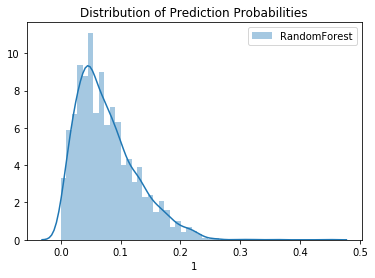

RandomForest predictions with default hyparameters for Test

Accuracy
0.485
[[ 67   2   8 108  60]
 [ 13   4  22 204  43]
 [  3   0  18 346  77]
 [  3   0   5 714 306]
 [  1   0   1 343 652]]
             precision    recall  f1-score   support

          1       0.77      0.27      0.40       245
          2       0.67      0.01      0.03       286
          3       0.33      0.04      0.07       444
          4       0.42      0.69      0.52      1028
          5       0.57      0.65      0.61       997

avg / total       0.51      0.48      0.43      3000

RandomForestpredictions with default hyparameters for Train

Accuracy
1.0


In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

result=pd.DataFrame()
def classifier(classifier, cname, rs): 
    model=classifier
    global result
    
    '''
    model.fit(trainfull, ytrain)
    pred=model.predict(testfull)
    tpred=model.predict(trainfull)
    '''
    predproba=pd.DataFrame(model.predict_proba(testfull))
    tpredproba=pd.DataFrame(model.predict_proba(trainfull))
    
    sns.distplot(predproba[0], label=str(cname))  
    plt.title("Distribution of Prediction Probabilities") 
    plt.legend()
    plt.show() ###     
    
    '''
    print(cname + ' predictions with default hyparameters for Test'+'\n')
    print('Accuracy')
    print(accuracy_score(ytest, pred, normalize=True))
    print(confusion_matrix(ytest, pred))
    print(classification_report(ytest, pred))  
    
    print(cname + 'predictions with default hyparameters for Train'+'\n')
    print('Accuracy')
    print(accuracy_score(ytrain, tpred, normalize=True))
    
    #compare bad predictions of different models; 
    result=pd.concat([result, pd.DataFrame(pred)], axis=1) #to merge the predicted labels back to the dataset;
    result.rename(columns={0:str(cname + '_pred')}, inplace=True)
    '''
#classifier(XGBClassifier(random_state=rs), 'XGBoost', 300)    
classifier(RandomForestClassifier(random_state=rs, n_estimators=500), 'RandomForest', 300)
#classifier(LogisticRegression(random_state=rs), 'LogisticRegression', 300)

In [146]:
data.to_csv('C:/Users/Yunsun2/Desktop/Github/yelp_cleaned.csv', sep=',')

In [145]:
df.to_csv(file_name, encoding='utf-8', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
textc          10000 non-null object
text_len       10000 non-null int64
dtypes: int64(5), object(7)
memory usage: 937.6+ KB


In [139]:
print('Conclusions:')
print('Performance for stars 1 significantly improved and stars 3, 4, 5 also improved!')
print('Remaining issues is: hard to differentiate stars 4 & 5. (try regression instead of classifier?)')
print('Marjority of star 3 are categorized to be star 4. (try regression model or adjust the probability threhhold?)')
print('Also, marjority of star 1 and 2 are identified to be the opposite 4 & 5 (more feature engineering?)')

Conclusions:
Performance for stars 1 significantly improved and stars 3, 4, 5 also improved!
Remaining issues is: hard to differentiate stars 4 & 5. (try regression instead of classifier?)
Marjority of star 3 are categorized to be star 4. (try regression model or adjust the probability threhhold?)
Also, marjority of star 1 and 2 are identified to be the opposite 4 & 5 (more feature engineering?)
